## ELECTRA Baseline

In [19]:
import torch
import matplotlib.pyplot as plt
import json
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np

# Set number of epochs
epochs = 5  # Set to 5 epochs as requested

# Lists to store loss and accuracy values
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Loss function (CrossEntropyLoss for classification)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    model.train()
    total_loss = 0
    correct_preds = 0
    total_preds = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        correct_preds += (preds == labels).sum().item()
        total_preds += labels.size(0)

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    train_accuracy = correct_preds / total_preds
    train_accuracies.append(train_accuracy)
    print(f"Training loss: {avg_loss:.4f}, Accuracy: {train_accuracy:.4f}")

    # Evaluation loop
    model.eval()
    total_loss = 0
    correct_preds = 0
    total_preds = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            # Forward pass for evaluation
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            correct_preds += (preds == labels).sum().item()
            total_preds += labels.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(test_loader)
    test_losses.append(avg_loss)
    test_accuracy = correct_preds / total_preds
    test_accuracies.append(test_accuracy)

    # Calculate F1 score
    f1 = f1_score(all_labels, all_preds, average="weighted")
    print(f"Validation loss: {avg_loss:.4f}, Accuracy: {test_accuracy:.4f}, F1 Score: {f1:.4f}")



Epoch 1/5
Training loss: 1.1009, Accuracy: 0.3334
Validation loss: 1.0987, Accuracy: 0.3320, F1 Score: 0.1655
Epoch 2/5
Training loss: 1.0998, Accuracy: 0.3364
Validation loss: 1.0997, Accuracy: 0.3378, F1 Score: 0.1706
Epoch 3/5
Training loss: 1.0997, Accuracy: 0.3310
Validation loss: 1.0987, Accuracy: 0.3320, F1 Score: 0.1655
Epoch 4/5
Training loss: 1.0998, Accuracy: 0.3323
Validation loss: 1.0994, Accuracy: 0.3378, F1 Score: 0.1706
Epoch 5/5
Training loss: 1.0995, Accuracy: 0.3337
Validation loss: 1.0998, Accuracy: 0.3302, F1 Score: 0.1640


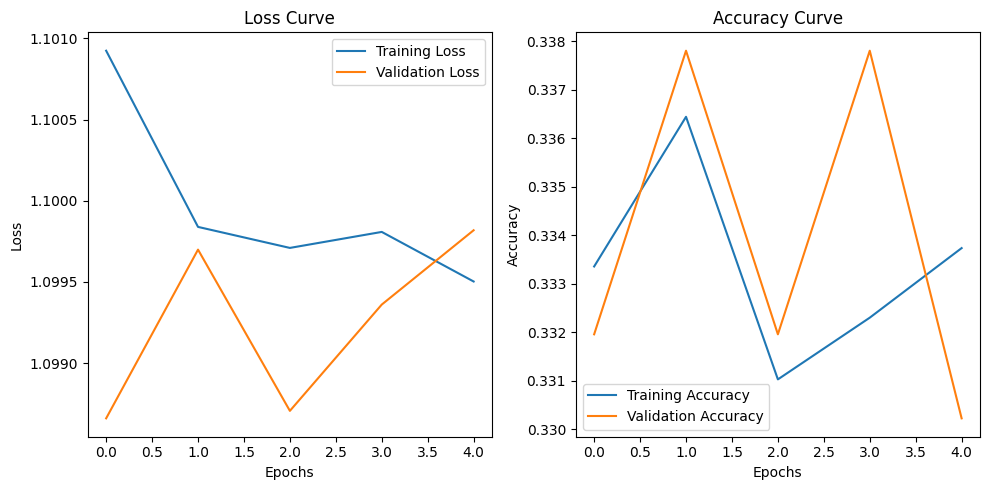

Loss and Accuracy curves saved as 'loss_accuracy_curve.png'.
Saving training history...
Training history saved as 'training_history.json'.
Saving model and tokenizer...
Model and tokenizer saved in 'electra_baseline_model' folder.


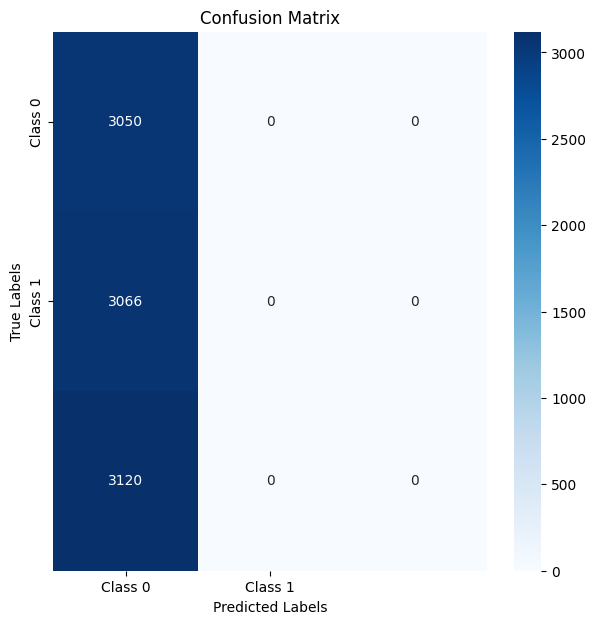

Confusion matrix saved as 'confusion_matrix.png'.


In [20]:
# Plotting loss and accuracy curves for training and validation
plt.figure(figsize=(10, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.tight_layout()
plt.savefig("loss_accuracy_curve.png")
plt.show()
print("Loss and Accuracy curves saved as 'loss_accuracy_curve.png'.")

# Save training history
print("Saving training history...")
history = {
    "train_losses": train_losses,
    "test_losses": test_losses,
    "train_accuracies": train_accuracies,
    "test_accuracies": test_accuracies
}

with open("training_history.json", "w") as f:
    json.dump(history, f)
print("Training history saved as 'training_history.json'.")

# Save model and tokenizer
print("Saving model and tokenizer...")
model.save_pretrained("electra_baseline_model")
tokenizer.save_pretrained("electra_baseline_model")
print("Model and tokenizer saved in 'electra_baseline_model' folder.")


# Additional visualization: Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()
print("Confusion matrix saved as 'confusion_matrix.png'.")

# If this is a binary classification, ROC Curve can be plotted as well
if len(set(all_labels)) == 2:
    fpr, tpr, _ = roc_curve(all_labels, all_preds)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})", color="blue")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    plt.show()
    print("ROC curve saved as 'roc_curve.png'.")
